<a href="https://colab.research.google.com/github/Ammar743/YouTube-Downloader-App/blob/master/diamond.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Necessary modules

In [68]:
# Ignore the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# Data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
 
# Configure
# Set matplotlib to inline and display graphs below the corresponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid', color_codes=True)

# Model selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.preprocessing import LabelEncoder

# Preprocess
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# DL libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping

# Specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2
import os
from tqdm import tqdm

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)


# Data Preparation

In [69]:
# Define directories and image size

X = []
Z = []
IMG_SIZE = 224
cushion_dir = 'images/cushion'
emerald_dir = 'images/emerald'
heart_dir = 'images/heart'
oval_dir = 'images/oval'
princess_dir = 'images/princess'
round_dir = 'images/round'

In [70]:
# Function to assign labels to images
def assign_label(img, diamond_type):
    return diamond_type

In [71]:
# Function to load and preprocess training data
def load_train_data():

    for img in tqdm(os.listdir(cushion_dir)):
        label = assign_label(img, 'Cushion')
        path = os.path.join(cushion_dir, img)
        img = cv2.imread(path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        X.append(np.array(img))
        Z.append(str(label))

    for img in tqdm(os.listdir(emerald_dir)):
        label = assign_label(img, 'Emerald')
        path = os.path.join(emerald_dir, img)
        img = cv2.imread(path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        X.append(np.array(img))
        Z.append(str(label))

    for img in tqdm(os.listdir(heart_dir)):
        label = assign_label(img, 'Heart')
        path = os.path.join(heart_dir, img)
        img = cv2.imread(path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        X.append(np.array(img))
        Z.append(str(label))

    for img in tqdm(os.listdir(oval_dir)):
        label = assign_label(img, 'Oval')
        path = os.path.join(oval_dir, img)
        img = cv2.imread(path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        X.append(np.array(img))
        Z.append(str(label))

    for img in tqdm(os.listdir(princess_dir)):
        label = assign_label(img, 'Princess')
        path = os.path.join(princess_dir, img)
        img = cv2.imread(path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        X.append(np.array(img))
        Z.append(str(label))

    for img in tqdm(os.listdir(round_dir)):
        label = assign_label(img, 'Round')
        path = os.path.join(round_dir, img)
        img = cv2.imread(path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        X.append(np.array(img))
        Z.append(str(label))
    return X, Y

In [72]:
# Load the training data
X, Y = load_train_data()

100%|██████████| 253/253 [00:00<00:00, 513.11it/s]


In [73]:
le = LabelEncoder()
Y = le.fit_transform(Z)
Y = tf.keras.utils.to_categorical(Y, num_classes=6)
X = np.array(X)
X = X / 255

# Model Building

In [74]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [75]:
# Define the model architecture
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(6, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [76]:
#Create a data augmentation and apply it to x_train data to prevent over-fitting

datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    rotation_range=60,  # randomly rotate images in the range (60, 0 to 180)
    zoom_range = 0.1, # Randomly zoom image 
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,
    shear_range=0.1,
    fill_mode = "reflect"
    ) 
datagen.fit(x_train)

In [77]:

red_lr = ReduceLROnPlateau(monitor='val_accuracy',patience=3,verbose=1,factor=0.1)

In [86]:
# Train the model
filepath = "ImageModel.hdf5"
checkpoint = ModelCheckpoint(filepath, save_weights_only=False, monitor='val_loss', mode='min', save_best_only=True, verbose=1)
earlyStop = EarlyStopping(monitor='val_loss', mode='min', patience=30)
callbacks_list = [earlyStop, checkpoint]

history = model.fit(datagen.flow(x_train, y_train, batch_size=32), epochs=100, validation_data=(x_test, y_test), callbacks=callbacks_list)

# Evaluate the model
model.evaluate(x_test, y_test)

Epoch 1/100
33/33 [==============================] - ETA: 0s - loss: 0.0147 - accuracy: 0.9971
Epoch 1: val_loss improved from inf to 0.03353, saving model to ImageModel.hdf5
33/33 [==============================] - 23s 709ms/step - loss: 0.0147 - accuracy: 0.9971 - val_loss: 0.0335 - val_accuracy: 0.9888
Epoch 2/100
33/33 [==============================] - ETA: 0s - loss: 0.0339 - accuracy: 0.9884
Epoch 2: val_loss did not improve from 0.03353
33/33 [==============================] - 12s 352ms/step - loss: 0.0339 - accuracy: 0.9884 - val_loss: 3.5761 - val_accuracy: 0.4854
Epoch 3/100
33/33 [==============================] - ETA: 0s - loss: 0.0241 - accuracy: 0.9913
Epoch 3: val_loss did not improve from 0.03353
33/33 [==============================] - 12s 367ms/step - loss: 0.0241 - accuracy: 0.9913 - val_loss: 3.1173 - val_accuracy: 0.4517
Epoch 4/100
33/33 [==============================] - ETA: 0s - loss: 0.0301 - accuracy: 0.9884
Epoch 4: val_loss did not improve from 0.03353
33/

[0.050850655883550644, 0.9865168333053589]

In [87]:
print("Test Accuracy: {0:.2f}%".format(model.evaluate(x_test,y_test)[1]*100)) #get score acording to test datas

14/14 [==============================] - 0s 25ms/step - loss: 0.0509 - accuracy: 0.9865
Test Accuracy: 98.65%


# Evaluating The Model

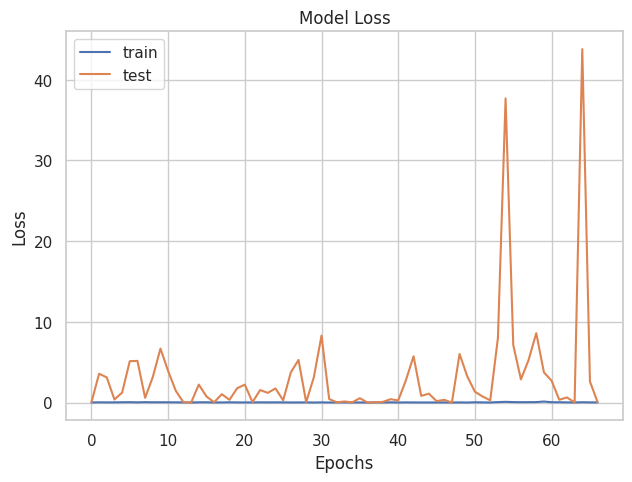

In [88]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

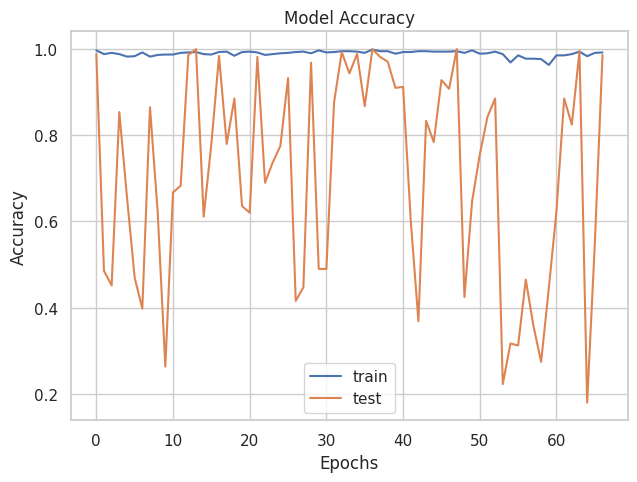

In [89]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [90]:
model.load_weights("ImageModel.hdf5")

loss, accuracy = model.evaluate(x_train, y_train, verbose=False)
print("Training Accuracy:  {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(x_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy:  0.9990
Testing Accuracy:  1.0000


14/14 [==============================] - 0s 27ms/step
Classification Report
              precision    recall  f1-score   support

     Cushion       1.00      1.00      1.00        70
     Emerald       1.00      1.00      1.00        77
       Heart       1.00      1.00      1.00        63
        Oval       1.00      1.00      1.00        69
    Princess       1.00      1.00      1.00        86
       Round       1.00      1.00      1.00        80

    accuracy                           1.00       445
   macro avg       1.00      1.00      1.00       445
weighted avg       1.00      1.00      1.00       445



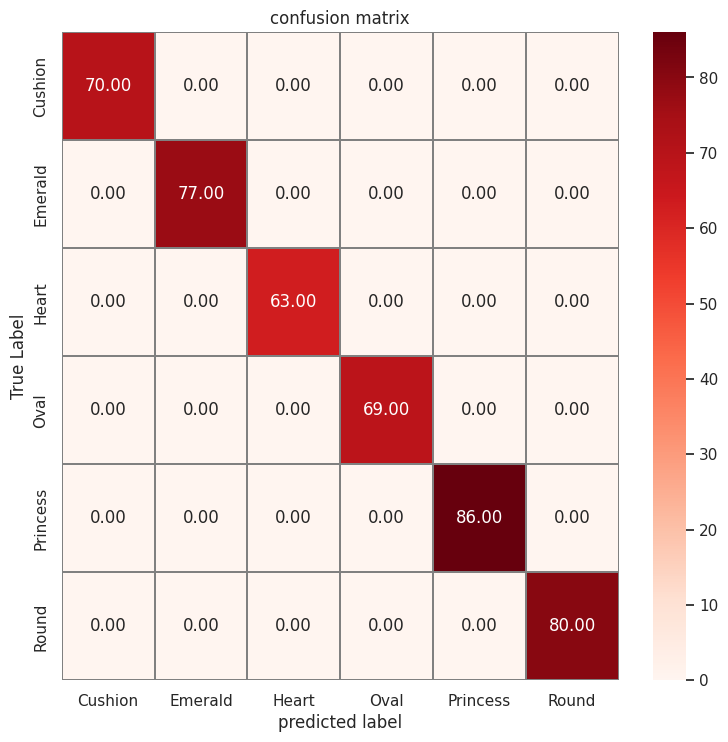

In [91]:
from sklearn.metrics import confusion_matrix,classification_report
# demonstration of calculating metrics for a neural network model using sklearn
# Predict the values from the validation dataset

Y_pred = model.predict(x_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1)
Y_true = np.argmax(y_test,axis = 1)

confusion_mtx = confusion_matrix(Y_true,Y_pred_classes)
print('Classification Report')
target_names = ['Cushion', 'Emerald','Heart', 'Oval','Princess', 'Round']
print(classification_report(Y_true, Y_pred_classes,target_names=target_names))
plt.figure(figsize = (8,8))
sns.heatmap(confusion_mtx,cmap= "Reds", linecolor = 'gray' , linewidth = 0.01 , annot = True, fmt='.2f' , xticklabels = target_names , yticklabels = target_names)
plt.xlabel("predicted label")
plt.ylabel("True Label")
plt.title("confusion matrix")
plt.show()

# Visualizing Predictions

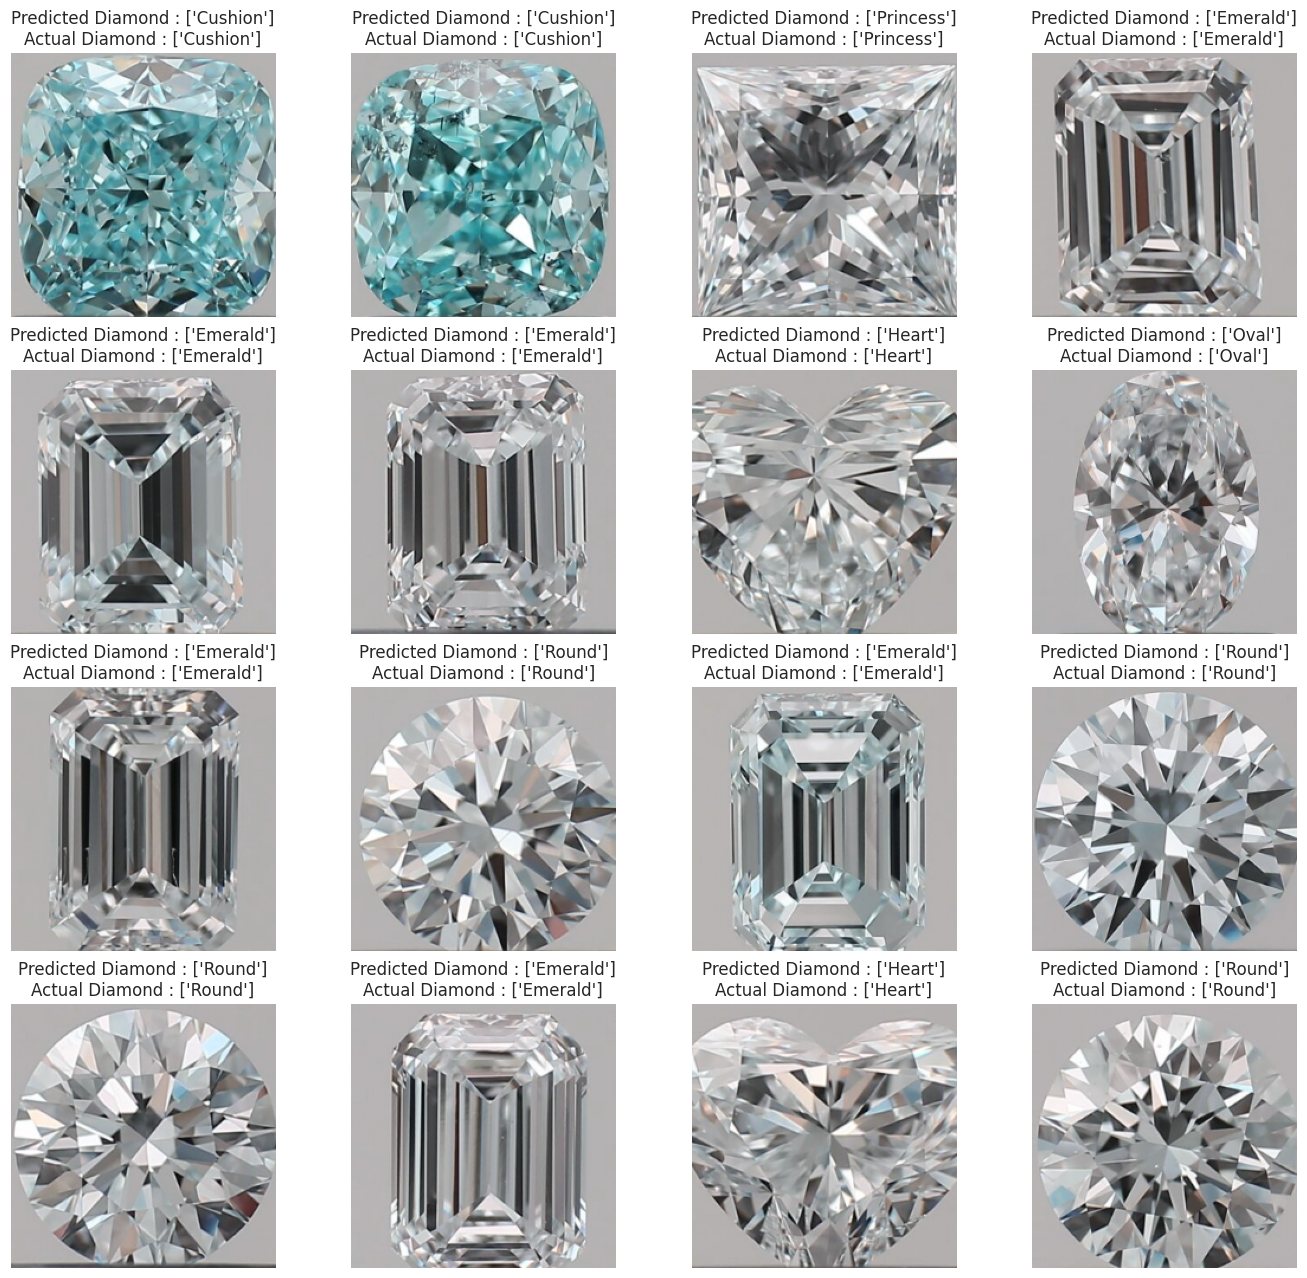

In [92]:
# figure out samples of this data with the true value and predicted ones
plt.figure(figsize=(15,15))
st = 10
for i in range(st,st+16):
    plt.subplot(4,4,i+1-st)
    plt.imshow(x_test[i])
    plt.title("Predicted Diamond : "+str(le.inverse_transform([Y_pred_classes[i]]))+"\n"+"Actual Diamond : "+str(le.inverse_transform([Y_true[i]])))
    plt.axis('off')

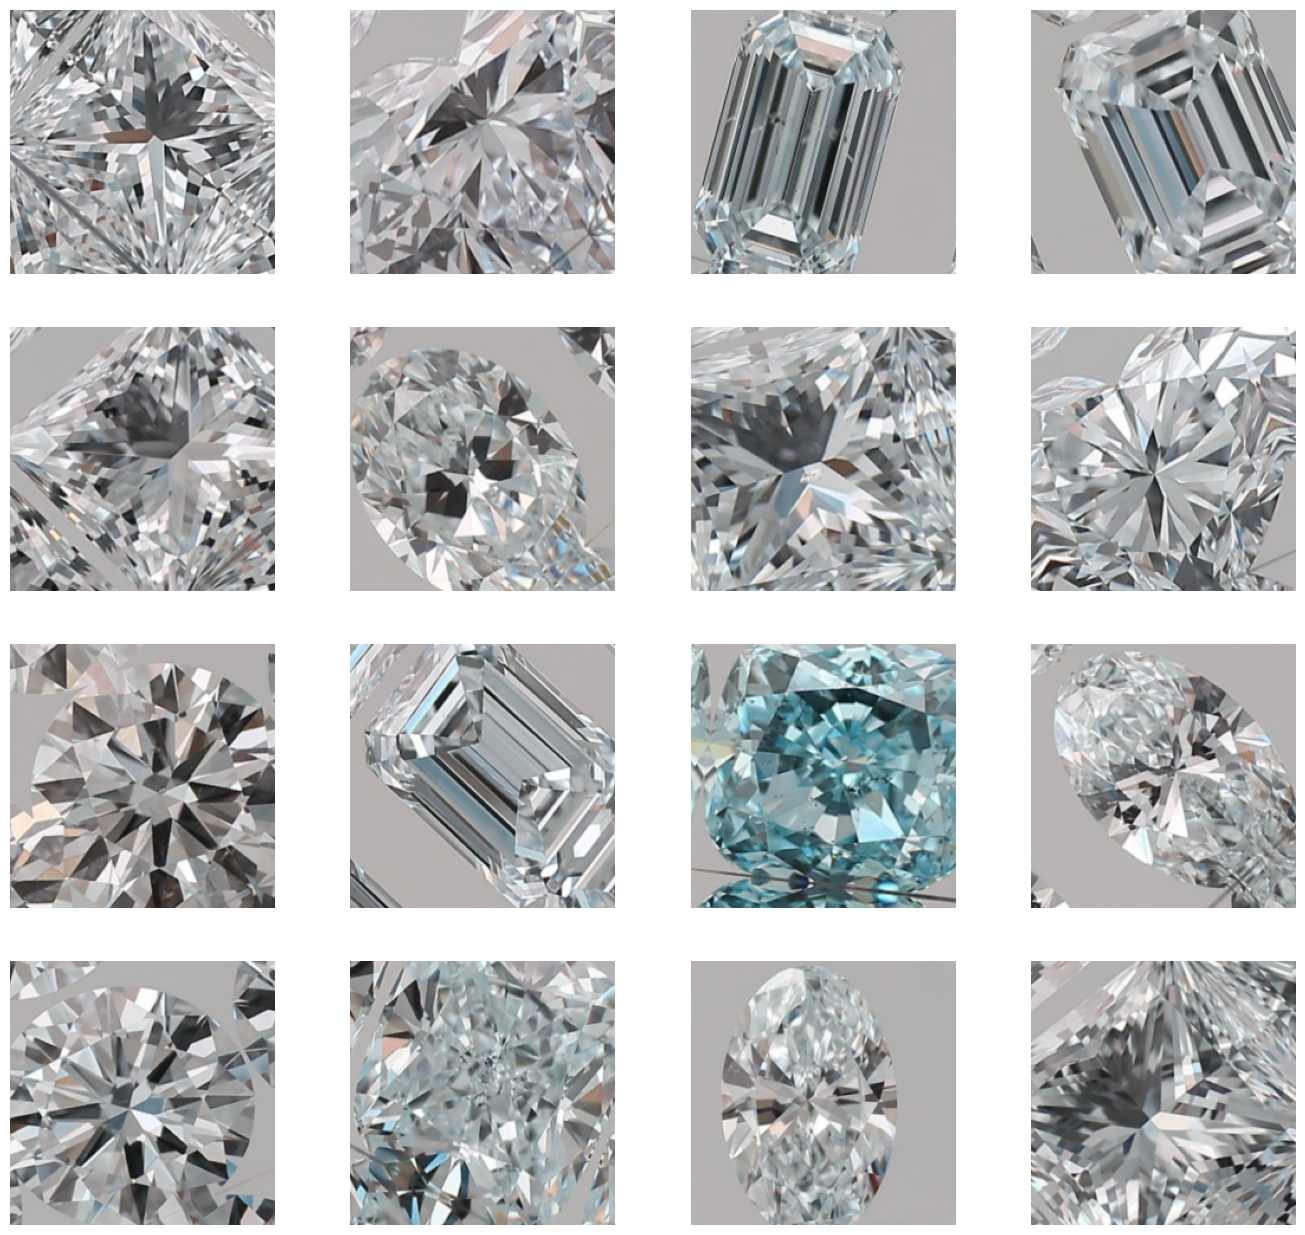

In [93]:
plt.figure(figsize=(15,15))    
for X, Y in datagen.flow(x_train, y_train, batch_size=32):
    for i in range(10, 10+16):
        plt.subplot(4,4,i+1-10)
        plt.imshow(X[i].reshape(224, 224, 3))
        plt.axis('off')    
    break
plt.show()